# Task:
    * Why churning rate is too much high?
    * Suggestion to control this churning?

# Assumption:
    * Tenure is giving in months
    * there are no outliers
    * major task is analyze churn data
    * senior citizens 1 means Yes and else No

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Importing dataset with the help of pandas

In [2]:
df = pd.read_csv(r"C:\Users\sanch\Downloads\EDA-main\EDA-main\Data\CustomerChurn.csv")

# Overview of dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


we find seniorcitizen is form of 0,1 hence we assume 0 means 'No' else "Yes"

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


from above info:
we find total charges are object so we need to convert
customer ID is not usefull for finding insight we remove the column

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Assuming tenure given in months
monthly charges of 50% people is above the avr charges

# Data cleaning and Data manipulation

In [8]:
#create copy of data before manipulation
df_original = df.copy()

In [9]:
#we convert total charges object to numerical dtypes
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')

In [10]:
df.TotalCharges.dtypes

dtype('float64')

In [11]:
df.tenure.max()


72

In [12]:
#here we make tenure group based on customers tenure
tenure_labels = [f'{x}-{x+11}' for x in range(1,72,12)]
df['tenure_grp']= pd.cut(df.tenure,range(1,80,12),labels = tenure_labels,right=False)

In [13]:
df.tenure_grp.value_counts()

tenure_grp
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [14]:
#we remove customerID, tenure column becuase there is no use of it
df.drop(['customerID','tenure'],axis=1,inplace=True)

# Gathering basic knowledge of churning

In [15]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
(df["Churn"].value_counts()*100)/(len(df["Churn"]))


Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

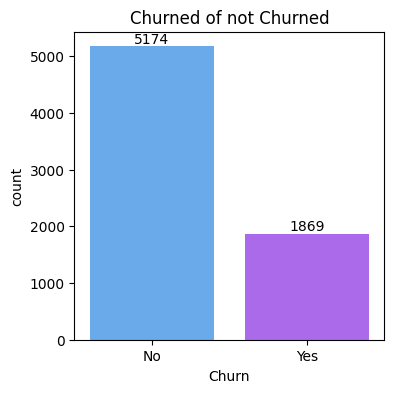

In [17]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(4,4))
ax = sns.countplot(x=df.Churn,palette='cool')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Churned of not Churned')
plt.show()

# we drop the wrong column SeniourCitizen instead of customer id
but we make copy of original data so we retrive the columns

In [18]:
df['seniorcitizen'] = df_original['SeniorCitizen']

In [19]:
df.columns #get the seniorcitizen column

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_grp', 'seniorcitizen'],
      dtype='object')

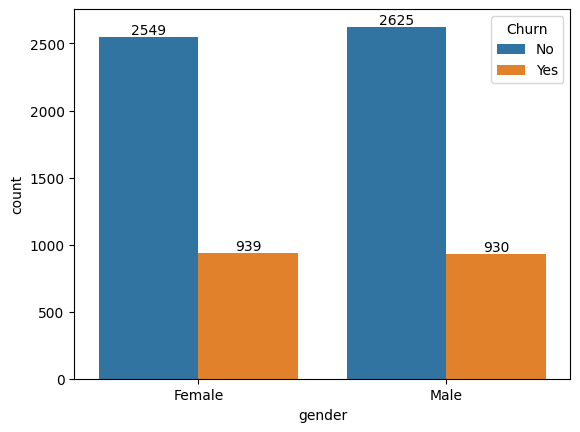

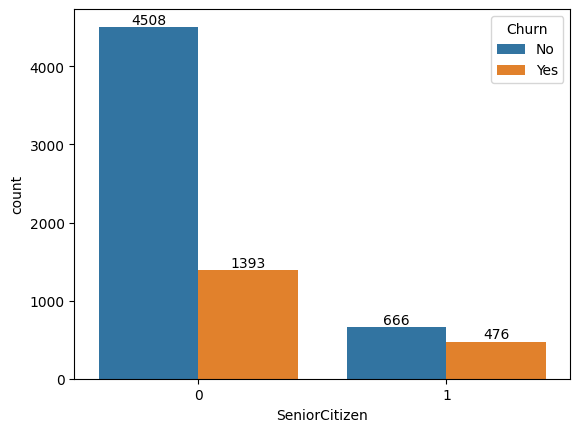

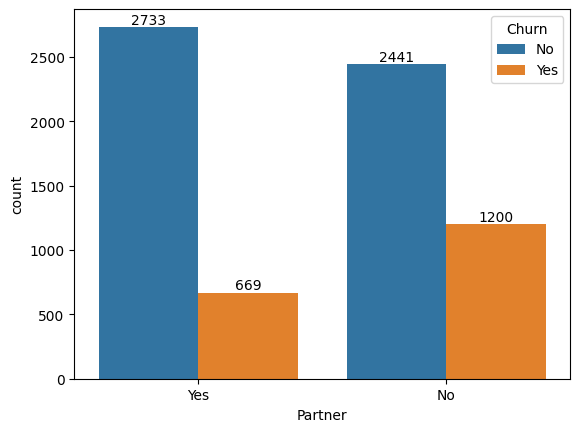

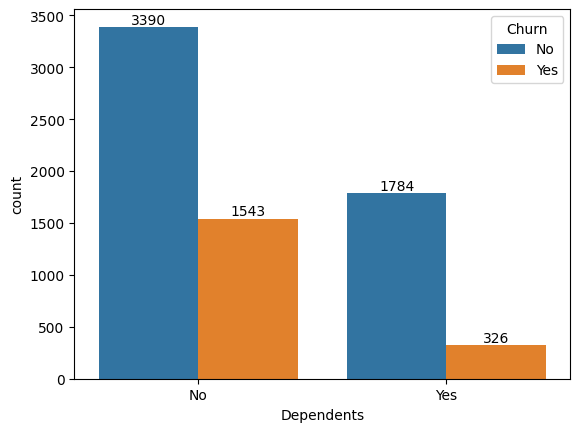

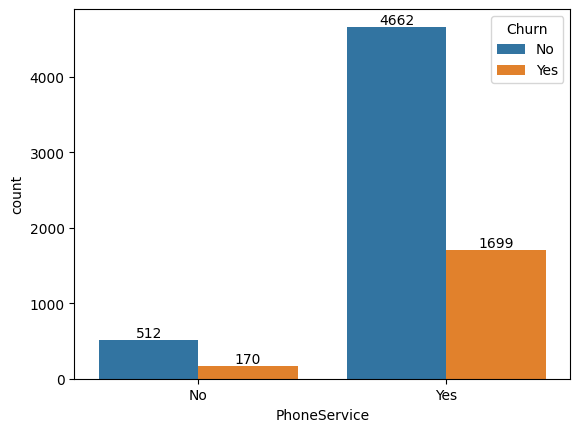

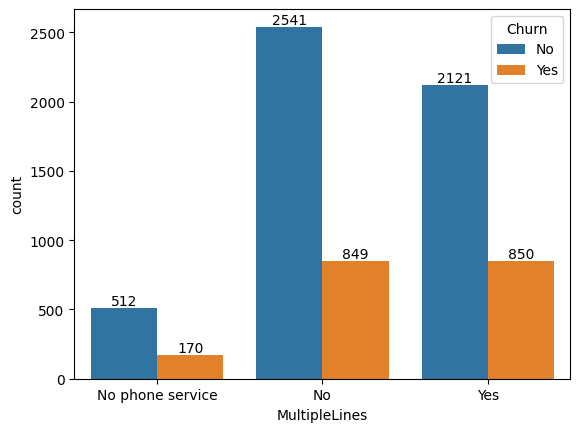

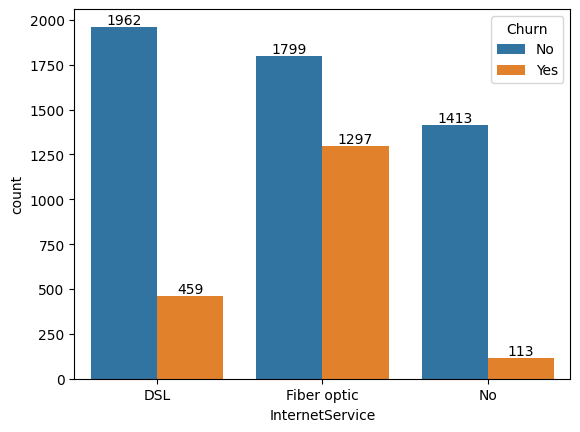

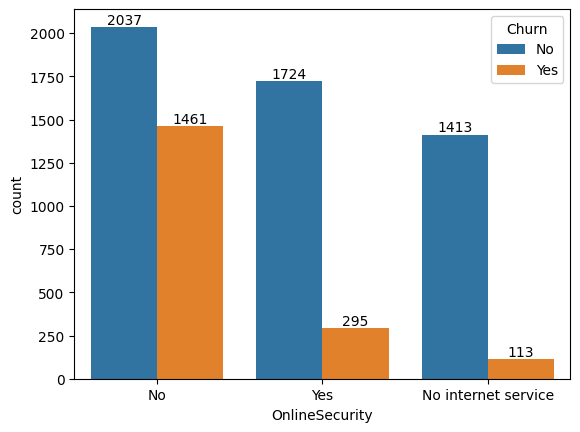

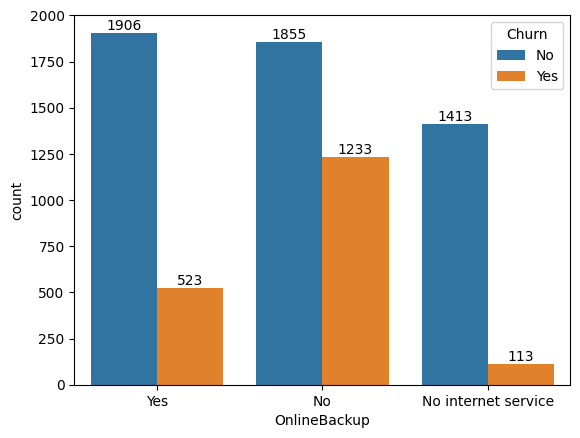

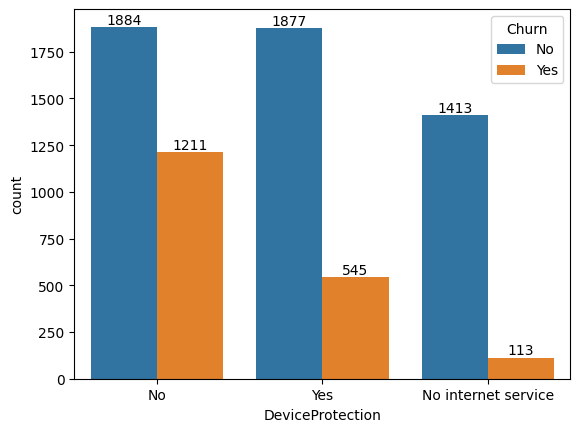

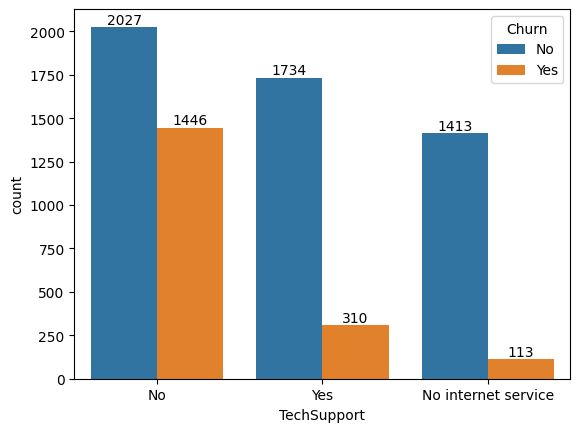

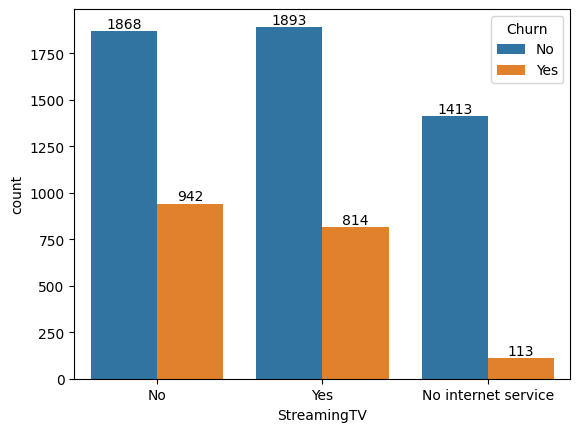

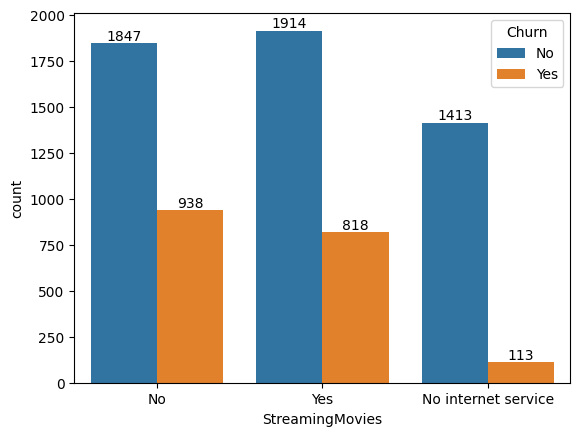

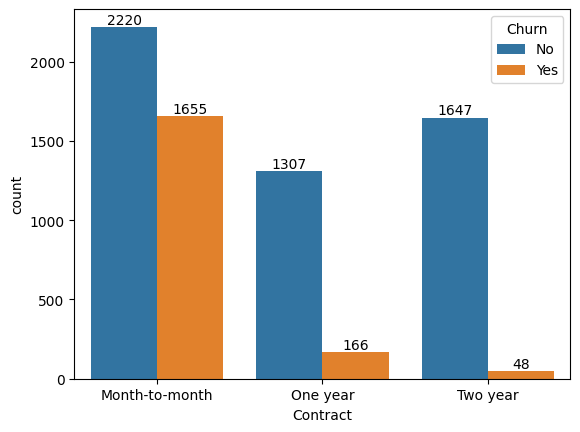

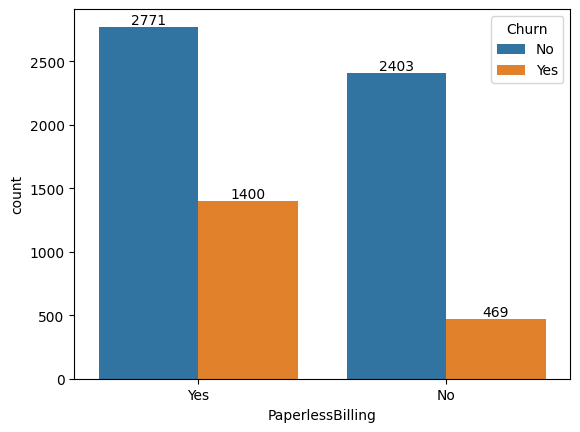

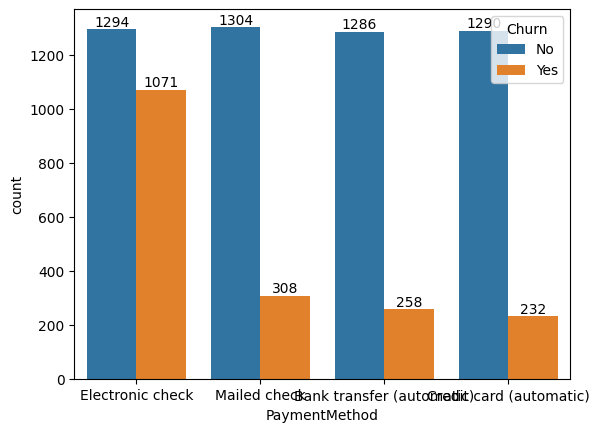

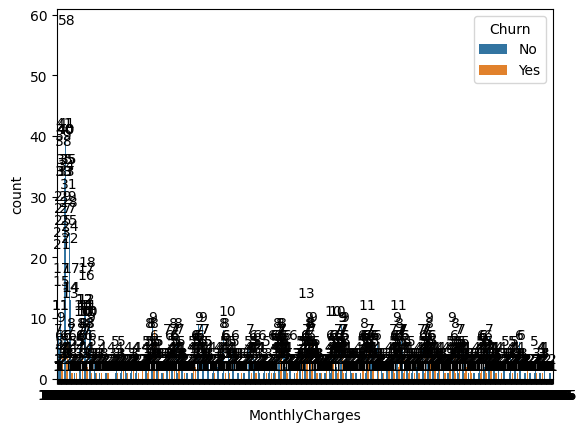

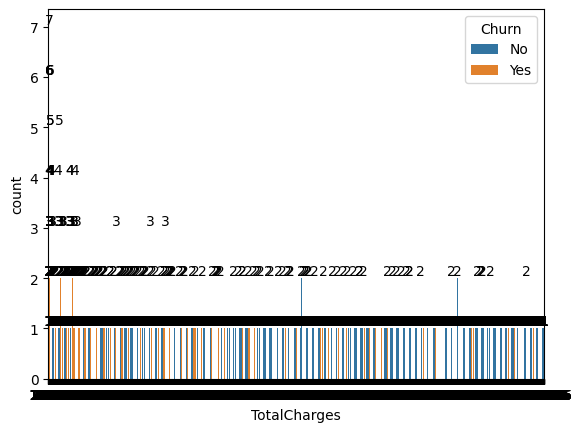

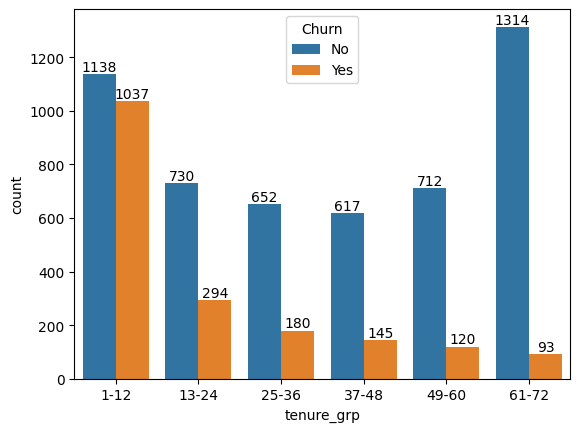

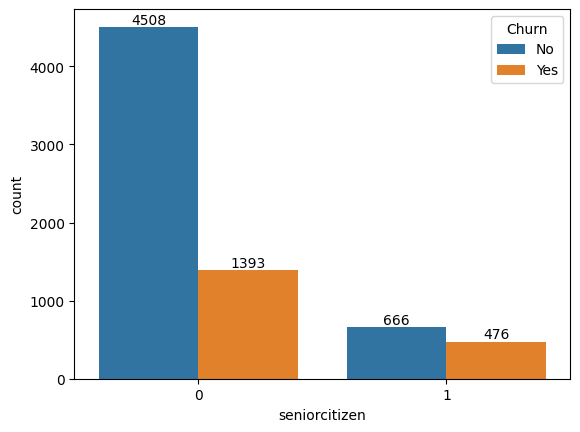

In [20]:
for i, predictor in enumerate(df.drop(columns=['Churn'])):
    plt.figure(i)
    ax= sns.countplot(x=predictor,data=df,hue="Churn")
    for i in ax.containers:
        ax.bar_label(i)

relation between total charges and monthly charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

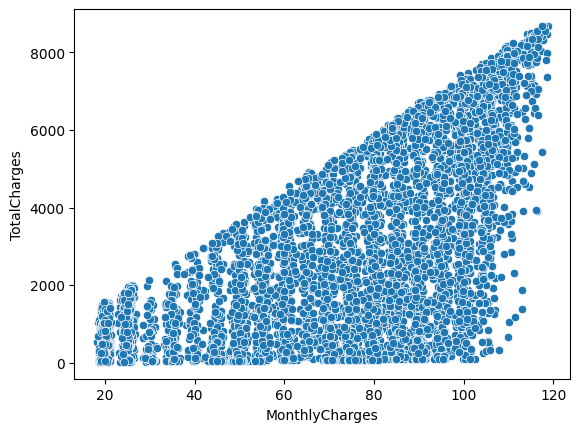

In [21]:
sns.scatterplot(x="MonthlyCharges",y='TotalCharges',data=df)

Total Charges increase as Monthly Charges increase - as expected.

# Analysing Data using Kernal Density

as we know churn are object dtype so we need to convert them

In [22]:
df_dummies = pd.get_dummies(df)

In [23]:
df_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,seniorcitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_grp_1-12,tenure_grp_13-24,tenure_grp_25-36,tenure_grp_37-48,tenure_grp_49-60,tenure_grp_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,True,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,True,True,False,False,False,True,False,False,False
2,0,53.85,108.15,0,False,True,True,False,True,False,...,False,True,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
4,0,70.70,151.65,0,True,False,True,False,True,False,...,True,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,False,True,False,True,False,True,...,False,True,True,False,False,True,False,False,False,False
7039,0,103.20,7362.90,0,True,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,True
7040,0,29.60,346.45,0,True,False,False,True,False,True,...,True,False,True,False,True,False,False,False,False,False
7041,1,74.40,306.60,1,False,True,False,True,True,False,...,False,True,False,True,True,False,False,False,False,False


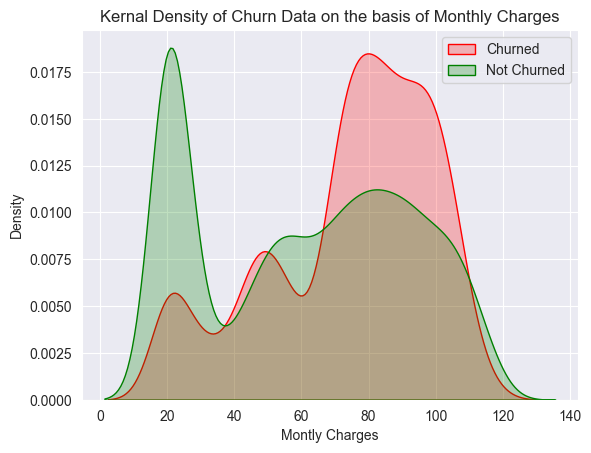

<Figure size 640x480 with 0 Axes>

In [42]:
sns.set_style('darkgrid')

mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn_Yes']==True)],fill=True,color='r',label='Churned')
mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn_No']==True)],fill=True,color='g',label='Not Churned')

plt.legend()
plt.ylabel('Density')
plt.xlabel('Montly Charges')
plt.title('Kernal Density of Churn Data on the basis of Monthly Charges')
plt.show()



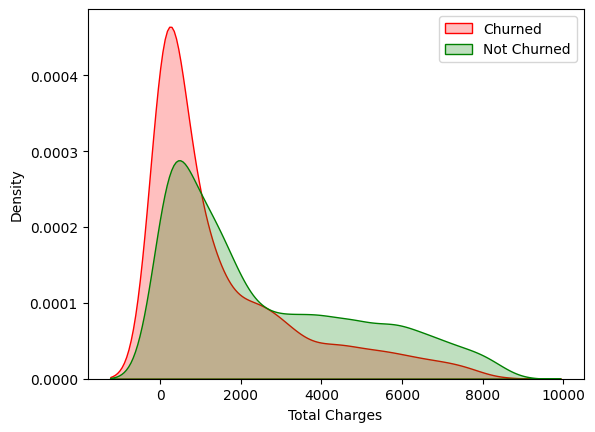

In [25]:
tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn_Yes']==True)],color='r',fill = True)
tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn_No']==True)],color ='g',fill=True)

plt.legend(['Churned','Not Churned'])
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.show()

from the above graphs as we can see most of the people churn with low tenure, low total charge, high monthly charges

In [26]:
#we want to convert churn data into 1 or 0 so we want to add that
df_dummies['Churn'] = df_original['Churn']

In [27]:
#here we convert Churn yes to 1 and else 0
df_dummies['Churn'] = np.where(df_dummies['Churn']=='Yes',1,0)


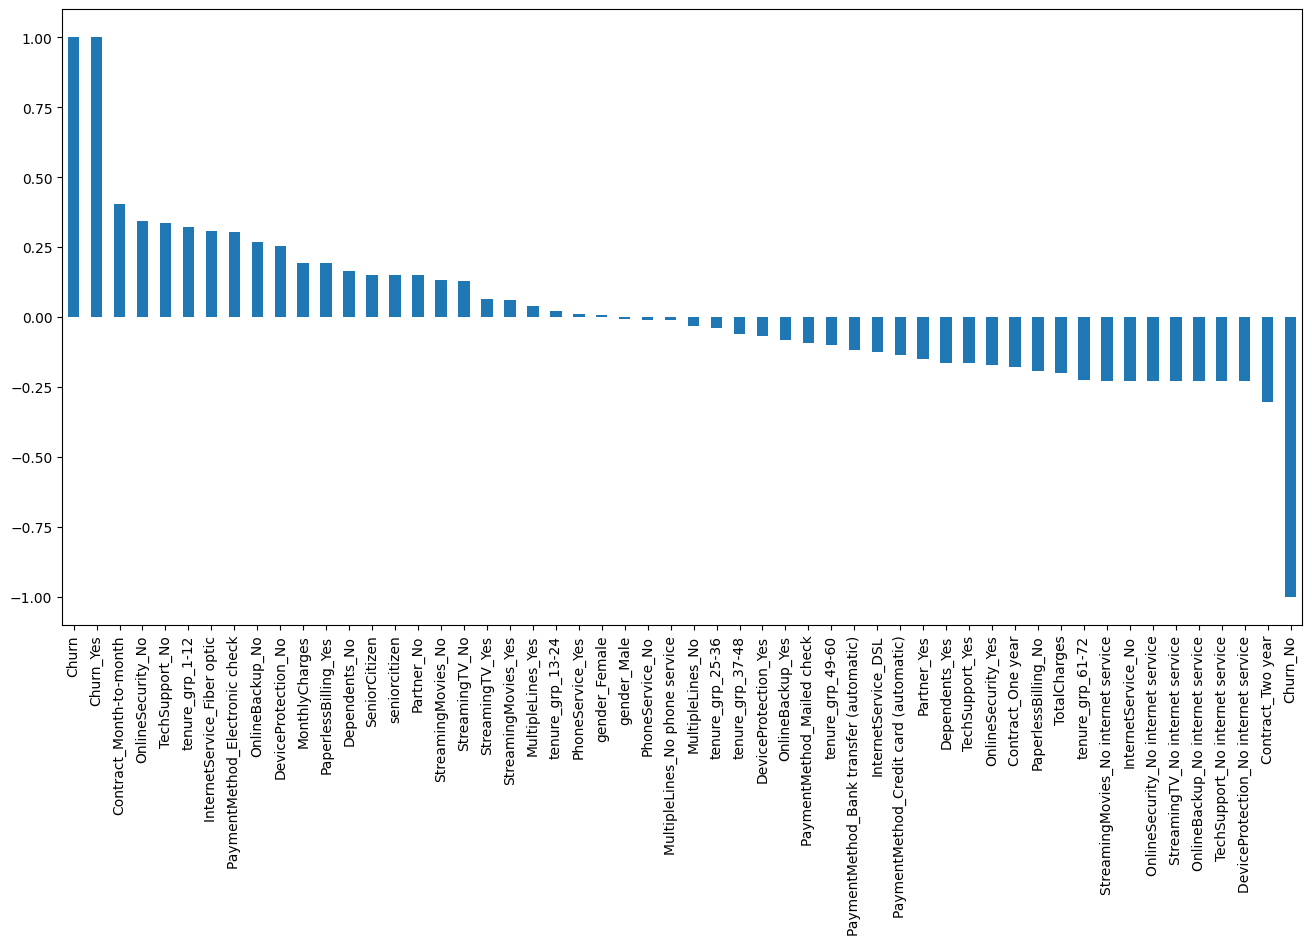

In [32]:
plt.figure(figsize=(16,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

<Axes: >

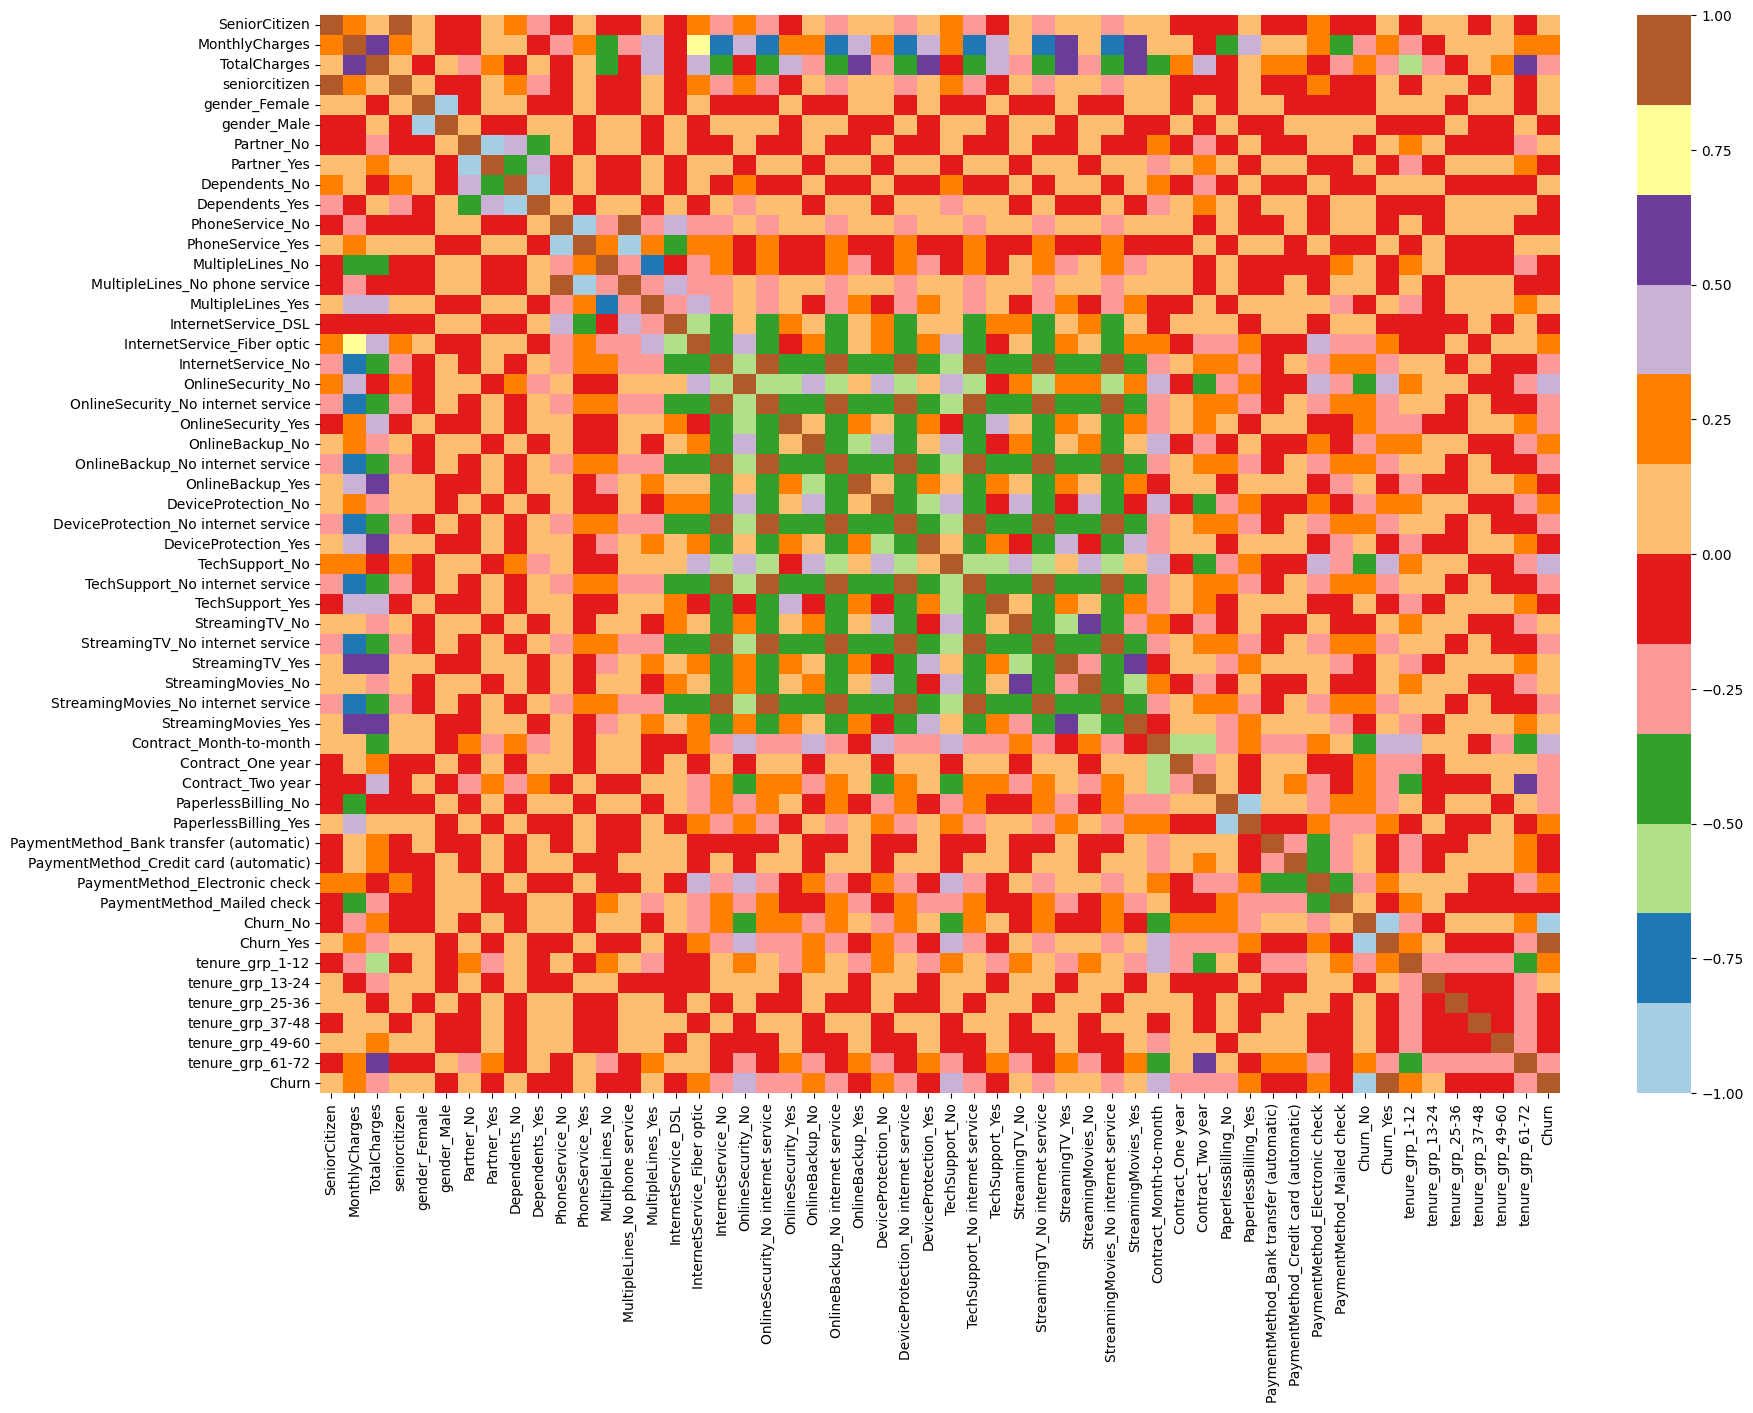

In [36]:
plt.figure(figsize=(20,14))
sns.heatmap(df_dummies.corr(),cmap='Paired')

In [37]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_grp', 'seniorcitizen'],
      dtype='object')

# Conclusion: 
Who more likely to churn:
    * More Churners are persons without partner, self dependent
    * Using fiber optics and without online backup, security, techsupport and device protection
    * With paying by month to month paperless electronic check
    * Senior citizen which have low tenure are more likely to churn
    * High monthly charges also a major reason to churn
    
Who don't like to churn:
    * Contract with two years and after one year contract 
    * Customer who are not internet user
    * tenure group with 61-72 
    

In [ ]:
Suggestions:
    * Improve internet connectivity and promote or attacth in promotion about your online security
    * Improve techsupport, electronic check
    * Promote offers and make intrest on long term subscription